## Ejercicio Práctico: Regresión lineal

En este ejercicio vamos a predecir la concentración del Glifosato en el agua.

### Paso 1: Importar las librerias

In [1]:
# Libreria para operaciones matemáticas o estadísticas
import numpy as np
# Libreria para el manejo de datos
import pandas as pd
# Librerías para gráficas
import matplotlib.pyplot as plt
# Librería para separar los datos de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
# Libreria para el algoritmo de regresión lineal
from sklearn.linear_model import LinearRegression
# Libreria para las métricas de regresión
from sklearn.metrics import mean_squared_error, r2_score

### Paso 2: Cargar los datos del archivo plano a un DataFrame

In [2]:
# Se cargan los datos de entrada
data = pd.read_csv("data/2.3-glifosato.csv", sep=";")
# Se observa la cantidad de registros y columnas del archivo
data.shape

(626, 9)

In [3]:
# Se observan los primeros registros
data.head()

,date(m/d/y),time,day,concentration,chloride(mg/L),DO(mg/L),ORP(mV),pH,turbidity(NTU+)
0,25/01/05,12.30,1,0.0,17.02,13.17,747,8.68,0.1
1,25/01/05,12.31,1,0.0,17.12,13.20,747,8.67,0.1
2,25/01/05,12.32,1,0.0,17.12,13.25,747,8.68,0.1
3,25/01/05,12.33,1,0.0,17.11,13.19,747,8.68,0.1
4,25/01/05,12.34,1,0.0,17.03,13.20,747,8.68,0.1


In [4]:
# Se observan las estadísticas de los datos, para valores numéricos
data.describe()

,time,day,concentration,chloride(mg/L),DO(mg/L),ORP(mV),pH,turbidity(NTU+)
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,13.869968,1.504792,1.161981,17.323882,13.348083,739.704473,8.652077,0.068371
std,1.857436,0.500377,1.164567,0.511636,0.133306,7.442400,0.091153,0.101617
min,10.050000,1.000000,0.000000,16.550000,12.980000,717.000000,8.240000,-0.100000
25%,12.562500,1.000000,0.000000,16.880000,13.280000,737.000000,8.650000,0.000000
50%,14.120000,2.000000,0.400000,17.105000,13.400000,740.000000,8.670000,0.000000
75%,15.287500,2.000000,1.500000,17.880000,13.450000,746.000000,8.700000,0.100000
max,17.300000,2.000000,3.000000,18.350000,13.530000,753.000000,8.730000,0.500000


### Paso 3: Procesamiento de los datos

In [5]:
# Eliminar filas con valores nulos
data = data.dropna()

# Mostrar las primeras filas
data.head()

,date(m/d/y),time,day,concentration,chloride(mg/L),DO(mg/L),ORP(mV),pH,turbidity(NTU+)
0,25/01/05,12.30,1,0.0,17.02,13.17,747,8.68,0.1
1,25/01/05,12.31,1,0.0,17.12,13.20,747,8.67,0.1
2,25/01/05,12.32,1,0.0,17.12,13.25,747,8.68,0.1
3,25/01/05,12.33,1,0.0,17.11,13.19,747,8.68,0.1
4,25/01/05,12.34,1,0.0,17.03,13.20,747,8.68,0.1


### Paso 3: Selección de variables y preparación para el modelo

In [6]:
# Seleccionar variables dependientes e independientes
X = data[['chloride(mg/L)', 'DO(mg/L)', 'ORP(mV)', 'pH', 'turbidity(NTU+)']]
y = data['concentration']

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Paso 4: Crear y entrenar el modelo de regresión lineal

In [7]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 0.6208290472239829
Coeficiente de determinación (R^2): 0.5714080489262698


### Paso 5: Generar la gráfica de los resultados

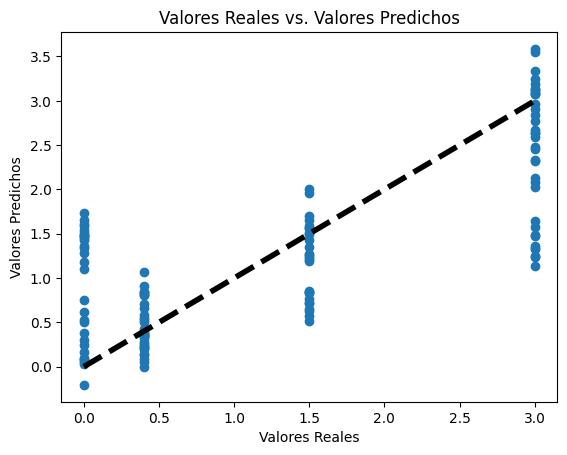

In [8]:
# Generar la gráfica
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.show()

### Evaluación del Modelo

* Error cuadrático medio (MSE): 0.62
* Coeficiente de determinación (R²): 0.57

El MSE mide el promedio de los cuadrados de los errores, es decir, la diferencia promedio entre los valores reales y los valores predichos. Un valor más bajo de MSE indica un mejor ajuste del modelo.

El R², también conocido como coeficiente de determinación, indica la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Un R² de 0.57 significa que aproximadamente el 57% de la variabilidad en la concentración de glifosato puede explicarse por las variables seleccionadas.

### Conclusiones del Modelo

1. Precisión del Modelo:

El modelo tiene un error cuadrático medio (MSE) de 0.62 y un coeficiente de determinación (R²) de 0.57. Esto sugiere que el modelo puede explicar aproximadamente el 57% de la variabilidad en la concentración de glifosato a partir de las variables independientes seleccionadas.

2. Interpretación de la Gráfica:
        
La gráfica de dispersión muestra los valores reales de la concentración de glifosato frente a los valores predichos por el modelo. La línea roja representa la línea de referencia donde los valores reales son iguales a los valores predichos.
        
La mayoría de los puntos están cerca de esta línea, lo que indica que el modelo tiene una capacidad razonable para predecir la concentración de glifosato. Sin embargo, hay algunos puntos alejados de la línea, lo que indica errores de predicción.

3. Mejora del Modelo:

Para mejorar el modelo, se podrían considerar las siguientes acciones:

* Incluir más variables independientes que puedan influir en la concentración de glifosato.
* Probar otros algoritmos de machine learning que puedan capturar mejor las relaciones no lineales entre las variables.
* Realizar una exploración de datos más profunda para identificar y tratar valores atípicos y posibles correlaciones entre variables.

4. Aplicación Práctica:

Este modelo puede ser útil para predecir la concentración de glifosato en función de variables como el cloruro, el oxígeno disuelto, el ORP, el pH y la turbidez del agua. Esto podría ser valioso para monitorear la calidad del agua y tomar decisiones informadas en la gestión ambiental y agrícola.